# torva kc for ironmen

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Vector convention: [helmet, chest, legs, horn, vambraces, hilt]
probs = (1/86) * np.array([1/6, 1/6, 1/6, 1/6, 1/4, 1/12])
prices = np.array([177000000, 403444000, 385223000, 353326000, 190133000, 36875000])

In [3]:
def gen_kc():
    
    # Roll from boss until full torva
    kc = 0
    xs = np.zeros(6)
    while xs[0] == 0 or xs[1] == 0 or xs[2] == 0:
        xs += np.random.multinomial(1, probs)
        kc +=1

    return kc

In [4]:
def gen_kcs(N):
    xs = np.zeros(N)
    for i in range(N):
        xs[i] = gen_kc()
    return xs

In [6]:
# Generate profit data for 4096 ironmen
N = 2**12
kcs = gen_kcs(N)

In [7]:
# Median profit
np.median(kcs)

829.0

In [8]:
# Maximum profit
np.max(kcs)

5392.0

In [12]:
np.min(kcs)

49.0

In [13]:
np.mean(kcs)

959.12890625

In [15]:
np.std(kcs)

599.9868606018781

In [9]:
# Look at middle 99% of distribution
a = np.percentile(kcs, 0.5)
b = np.percentile(kcs, 99.5)
x = (kcs[(kcs<b) & (kcs>a)])
np.size(x)

4054

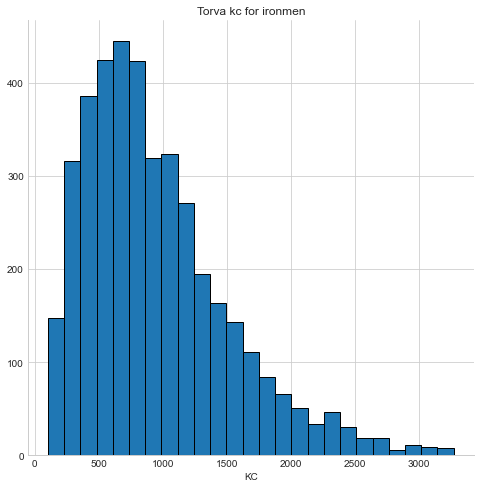

In [11]:
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
plt.title("Torva kc for ironmen")
plt.xlabel("KC")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.hist(x, bins = 25, ec = "black");